**Alumnos**

Huaranca Fernando : 478/18

Vazquez Julieta: 729/18

#Ejercicio 1



In [ ]:
#Importar librerias
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

#Plantamos una semilla para que los datos sean los mismos
np.random.seed(123)

In [ ]:
#Definimos funcion metodo del descenso

def metodo_del_descenso(A,b,xo,N):

  #Filas de la matriz 
  n = A.shape[0]

  #Si ingresamos un vector de largo 0 lo reemplazamos por un vector random de largo de las filas
  if len(xo) == 0:
    x = np.random.random(n)
  else:
    x = xo
  
  #Lista en la que almacenamos los errores al aproximar 
  lista_errores = []
  
  #Ciclo que devuelve la aproximacion de X(N) y una lista de errores
  for i in range(0,N):
    r = b - (A @ x)
    landa = ((np.transpose(r)@r)) / (np.transpose(r) @A@r)
    x = x + landa * r
    error = np.linalg.norm(b - (A @ x),2)
    lista_errores.append(error) 
  
  #Retornamos como primer elemento el vector aproximado y como segundo una lista con los errores
  return x,lista_errores

#Ejercicio 2

Datos que vamos a usar en el método

In [ ]:
#Generamos una matriz 10x10 aleatoria
M =  np.random.rand(10,10)

#Generamos una matriz aleatoria A a partir de M
A = (np.transpose(M) @ M)+ np.eye(10)

#Vector con coordenadas aleatorias
b = np.random.rand(10)

#Vector inicial con coordenadas aleatorias
xo = np.random.rand(10)

#Pasos para el metodo del descenso
N = 20

In [ ]:
#Tomamos la lista de errores
errores = metodo_del_descenso(A,b,xo,N)[1]

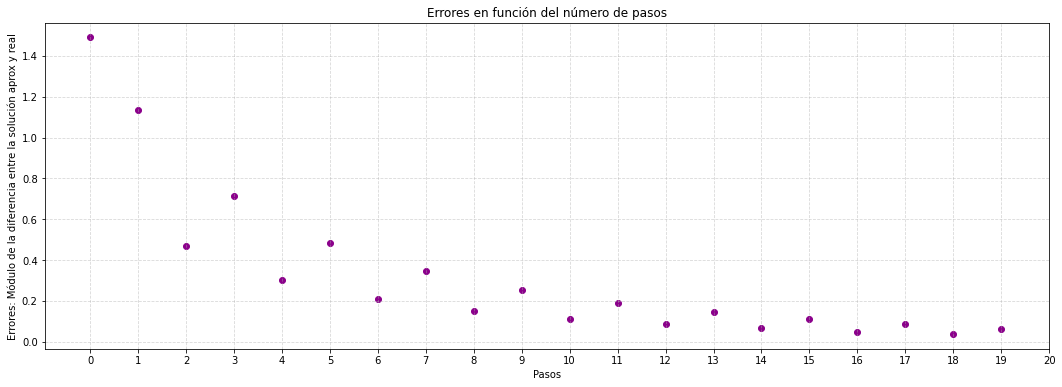

In [ ]:
#Generamos grafico
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(range(len(errores)),errores,color = "darkmagenta")
ax.grid("on",linestyle="dashed",alpha=0.5)

#Titulo del grafico
ax.set_title("Errores en función del número de pasos")

#Titulos 
ax.set_ylabel("Errores: Módulo de la diferencia entre la solución aprox y real") #eje y
ax.set_xlabel("Pasos") #eje x

#Eje x
x_ticks = np.arange(0,21,1)
ax.set_xticks(x_ticks)

#Muestro grafico
plt.show()

#Ejercicio 3

Funcion que recibe una lista d de vectores y un vector v y devuelve un vector u que es el resultado de aplicar un paso
de la modificacion de Gram-Schimidt

In [ ]:
#v vector inicial
#A una matriz
def g_s_A(d,v,A):
  u = v
  for i in range(len(d)):
    u = u - ((np.transpose(v) @ A @ d[i]) / (np.transpose(d[i]) @ A @ d[i])) * (d[i])
  return u

#Ejercicio 4

In [ ]:
def gradiente_conjugado(A,b,xo,N):

  #Filas de la matriz 
  n = A.shape[0]

  #Si ingresamos un vector de largo 0 lo reemplazamos por un vector random de largo de las filas
  if len(xo) == 0:
    x = np.random.random(n)
  else:
    x = xo
  
  # d lista vacia
  d = []

  #lista vacia para almacenar los errores
  lista_errores = []

  #Ciclo que calcula la aproximacion de x**(N) y una lista de errores
  for i in range(N):
    r = b- (A@x)
    r_gs = g_s_A(d,r,A)
    landa = (np.transpose(r_gs)@r) / (np.transpose(r_gs) @A@r_gs)
    x = x + landa * r_gs
    d.append(r_gs)
    error = np.linalg.norm(b - (A @ x),2)
    lista_errores.append(error) 

  #Primer elemento aproximacion del vector, segundo elemento lista de errores
  return x, lista_errores

#Ejercicio 5

Se repite los datos del ejercicio 2

In [ ]:
#Generamos una matriz 10x10 aleatoria
M =  np.random.rand(10,10)

#Generamos una matriz aleatoria A 
A = (np.transpose(M) @ M)+ np.eye(10)

#Vector con coordenadas aleatorias
b = np.random.rand(10)

#Vector inicial con coordenadas aleatorias
xo = np.random.rand(10)

#Pasos para el metodo del descenso
N = 20

In [ ]:
#Lista de errores del metodo del gradiente conjugado
errores_grad_conj = gradiente_conjugado(A,b,xo,N)[1]

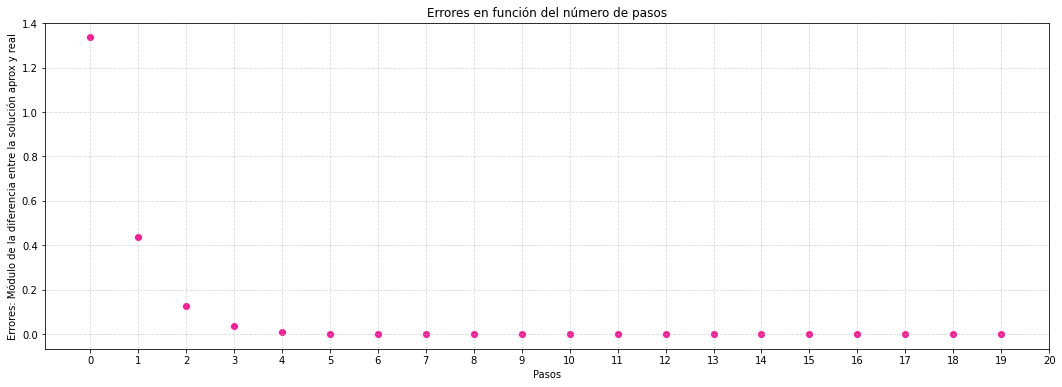

In [ ]:
#Generamos grafico
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(range(len(errores_grad_conj)),errores_grad_conj,color = "deeppink")
ax.grid("on",linestyle="dashed",alpha=0.5)

#Titulo del grafico
ax.set_title("Errores en función del número de pasos")

#Titulos 
ax.set_ylabel("Errores: Módulo de la diferencia entre la solución aprox y real") #eje y
ax.set_xlabel("Pasos") #eje x

#Eje x
x_ticks = np.arange(0,21,1)
ax.set_xticks(x_ticks)

#Muestro grafico
plt.show()


Sabemos que el método del gradiente conjugado converge en a lo sumo en n pasos (siendo n el tamaño de la matriz), pero no podemos afirmar lo mismo en el caso del método del descenso. 

Según los resultados obtenidos en los experimentos numéricos hechos más arriba, se llega a la conclusión de que el método del gradiente conjugado es más apropiado para resolver un sistema de ecuaciones lineales ya que este método converge en un número menor de pasos. 
